In [6]:
import wget

In [3]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-07-25 16:38:54--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 52.222.161.125, 52.222.161.143, 52.222.161.151, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|52.222.161.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48,12K  --.-KB/s    in 0,02s   

2022-07-25 16:38:54 (2,31 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [2]:
#download and read genome
def readGenome(filename):
    genome = ''
    with open(filename,'r') as f:
        for line in f: # read the file line by line.
            if not line[0] == '>': #we don't read the first "line": the first character of the line is not ">".
                genome += line.rstrip() # rstrip() remove trailing whitespace or other special characters from the end of line = 从行末尾删除尾随空格和其他
    return genome
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [5]:
len(genome)

48502

In [10]:
counts = {'A':0, 'C':0, 'G':0, 'T':0}
for base in genome: #"base" could be replaced by any word. 
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [11]:
#use the build-in function in python: "collections" to count
import collections
collections.Counter(genome)  

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [12]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-07-25 17:23:20--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 205.251.222.195, 205.251.222.55, 205.251.222.53, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|205.251.222.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219,52K  --.-KB/s    in 0,1s    

2022-07-25 17:23:21 (1,76 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [19]:
@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

SyntaxError: invalid syntax (1554268475.py, line 1)

In [17]:
def readFastq(filename):
    sequences = []  #why "[]" . Seems like an array.
    qualities = []  
    with open(filename) as fh:
        while True:   #infinite loop?
            fh.readline()  #The readline() returns one line from the file.
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual) #The append() method adds an item to the end of the list.
        return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
  #How they skip the lines  ""@SRR835775.1 1/1" and  "+" ?


In [4]:
len('@SRR835775.1 1/1')

16

In [20]:
#print first 5 sequences
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [21]:
#print first 5 qualities strings.
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [13]:
len(quals) #why can't calculate the number of array quals? "quals" is an array, right? 

NameError: name 'quals' is not defined

In [26]:
def phred33ToQ(qual):
    return ord(qual) - 33 #The ord() function returns an integer representing the Unicode character.

In [27]:
phred33ToQ('#')

2

In [28]:
phred33ToQ('J')

41

In [7]:
len(quals)

NameError: name 'quals' is not defined

In [30]:
def creatHist(qualities):
    hist = [0] * 50 #what's this?
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
        return hist
h = creatHist(quals)
print(h)
#here we know the number of "quals"

[0, 0, 34, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 3, 0, 0, 2, 0, 5, 0, 1, 1, 0, 4, 0, 12, 4, 5, 5, 5, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


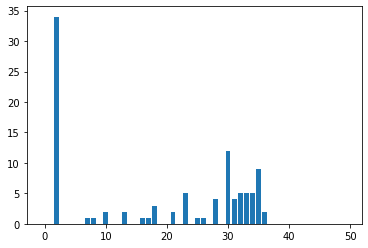

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()